In [2]:
%matplotlib widget
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display, clear_output


### Load the pre-computed simulation results from the parquet files

In [3]:
results100 = pd.read_parquet('results100p')
results200 = pd.read_parquet('results200p')
results300 = pd.read_parquet('results300p')
results400 = pd.read_parquet('results400p')


### Load the test data of TMD11-15 on Karlsruhe fine sand

In [14]:
TMD11 = pd.read_csv('TMD11.dat', sep ='\s+', header = None ).drop([8,9,10],axis=1).drop([0,1]).reset_index(drop=True)
TMD11.columns=['eps1', 'epsv', 'eps3', 'epsq', 'void_ratio', 'q', 'p', 'eta']
TMD11 = TMD11.astype(float)
TMD12 = pd.read_csv('TMD12.dat', sep ='\s+', header = None ).drop([8,9,10],axis=1).drop([0,1]).reset_index(drop=True)
TMD12.columns=['eps1', 'epsv', 'eps3', 'epsq', 'void_ratio', 'q', 'p', 'eta']
TMD12 = TMD12.astype(float)
TMD13 = pd.read_csv('TMD13.dat', sep ='\s+', header = None ).drop([8,9,10],axis=1).drop([0,1]).reset_index(drop=True)
TMD13.columns=['eps1', 'epsv', 'eps3', 'epsq', 'void_ratio', 'q', 'p', 'eta']
TMD13 = TMD13.astype(float)
TMD14 = pd.read_csv('TMD14.dat', sep ='\s+', header = None ).drop([8,9,10],axis=1).drop([0,1]).reset_index(drop=True)
TMD14.columns=['eps1', 'epsv', 'eps3', 'epsq', 'void_ratio', 'q', 'p', 'eta']
TMD14 = TMD14.astype(float)
TMD15 = pd.read_csv('TMD15.dat', sep ='\s+', header = None ).drop([8,9,10],axis=1).drop([0,1]).reset_index(drop=True)
TMD15.columns=['eps1', 'epsv', 'eps3', 'epsq', 'void_ratio', 'q', 'p', 'eta']
TMD15 = TMD15.astype(float)


### Build an interactive widget

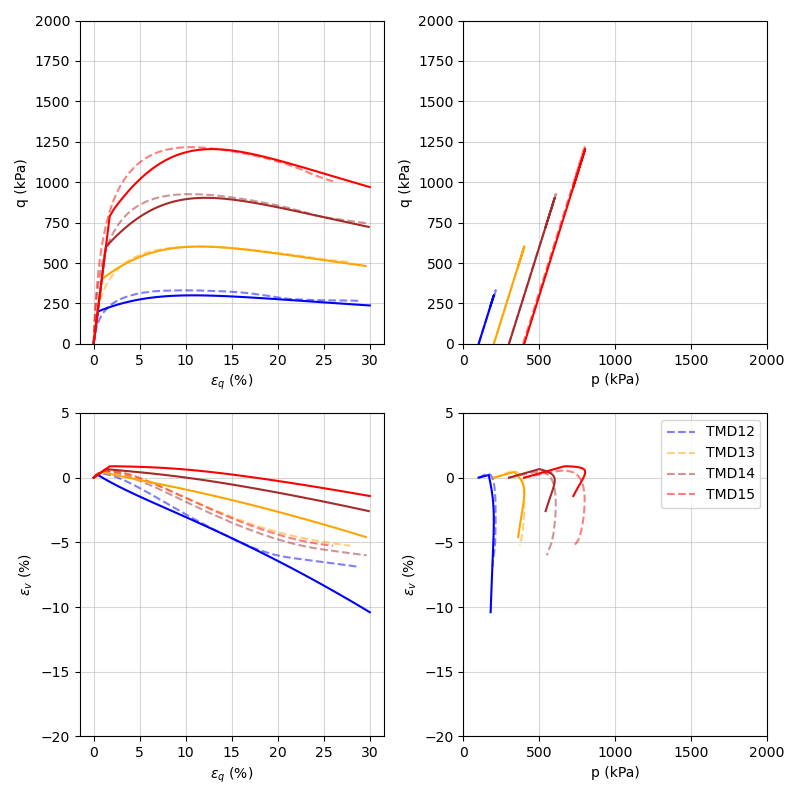

In [15]:
sliderK = widgets.IntSlider(description='K', value=30, min=20, max=40, step=5, continuous_update=False)
sliderG = widgets.IntSlider(description='G', value=15, min=5, max=25, step=5, continuous_update=False)
sliderm = widgets.FloatSlider(description='m', value=-1.5, min=-2.1, max=-0.9, step=0.3, continuous_update=False)
sliderc = widgets.IntSlider(description='c', value=10, min=6, max=14, step=2, continuous_update=False)
slidergamma = widgets.IntSlider(description='gamma', value=20, min=10, max=30, step=5, continuous_update=False)
sliderD = widgets.FloatSlider(description='D', value=-130, min=-150, max=-110, step=10, continuous_update=False)
sliderk0 = widgets.FloatSlider(description='k0', value=1.2, min=0.8, max=1.6, step=0.2, continuous_update=False)

upperbox = widgets.HBox([sliderK, sliderG, sliderm, sliderc])
lowerbox = widgets.HBox([slidergamma, sliderD, sliderk0])

fig, ax = plt.subplots(2, 2, figsize=(8, 8))
Load_tag = 110



display(widgets.VBox([upperbox,lowerbox]))
def update(value):
    ax[0,0].clear()
    ax[0,1].clear()
    ax[1,0].clear()
    ax[1,1].clear()
    
    TMD_list = ['TMD12','TMD13','TMD14','TMD15']
    color_list = ['blue','orange','brown','red']
    
    for i, TMD in enumerate((TMD12,TMD13,TMD14,TMD15)):
        ax[0,0].plot(TMD['epsq'],TMD ['q'], '--', color=color_list[i], label=TMD_list[i],alpha=0.5)
        ax[0,1].plot(TMD['p'], TMD['q'], '--', color=color_list[i], label=TMD_list[i],alpha=0.5)
        ax[1,0].plot(TMD['epsq'], TMD['epsv'], '--', color=color_list[i], label=TMD_list[i],alpha=0.5)
        ax[1,1].plot(TMD['p'], TMD['epsv'], '--', color=color_list[i], label=TMD_list[i],alpha=0.5)

    K = sliderK.value
    G = sliderG.value
    m = round(sliderm.value,1)
    c = sliderc.value
    gamma = slidergamma.value
    D = sliderD.value
    k0 = round(sliderk0.value,1)
    
    for i, results in enumerate((results100, results200, results300, results400)):
        get_result = results.loc[K,G,m,c,gamma,D,k0]


        p = (get_result['sigm_xx'] + get_result['sigm_yy'] + get_result['sigm_zz'])/3
        q = get_result['sigm_zz'] - get_result['sigm_xx']
        eps_v = (get_result['eps_xx'] + get_result['eps_yy'] + get_result['eps_zz']) * 100
        eps_q = 2/3 * (get_result['eps_zz'] - get_result['eps_xx']) * 100
        p_total = p[0] + q/3
        u = p_total - p



        ax[0,0].plot(eps_q,q, color=color_list[i])
        ax[0,0].set_ylim(0,2000)
        
        ax[0,1].plot(p,q, color=color_list[i])
        if Load_tag == 110:
            ax[1,0].plot(eps_q,eps_v, color=color_list[i])
            ax[1,1].plot(p,eps_v, color=color_list[i])
        if Load_tag == 100:
            ax[1,0].plot(eps_q,u, color=color_list[i])
            ax[1,1].plot(p,u, color=color_list[i])

        ax[0,0].set_xlabel(f'$\epsilon_q$ (%)')
        ax[0,0].set_ylabel("q (kPa)")

        ax[0,1].set_xlabel("p (kPa)")
        ax[0,1].set_ylabel("q (kPa)")
        ax[0,1].set_xlim(0,2000)
        ax[0,1].set_ylim(0,2000)
        
        


        ax[1,0].set_xlabel(f'$\epsilon_q$ (%)')
        if Load_tag == 110:
            ax[1,0].set_ylabel(f'$\epsilon_v$ (%)')
        if Load_tag == 100:
            ax[1,0].set_ylabel(f'u (kPa)')
        ax[1,0].set_ylim(-20,5)


        ax[1,1].set_xlabel("p (kPa)")
        if Load_tag == 110:
            ax[1,1].set_ylabel(f'$\epsilon_v$ (%)')
        if Load_tag == 100:
            ax[1,1].set_ylabel(f'u (kPa)')    
        ax[1,1].set_xlim(0,2000)
        ax[1,1].set_ylim(-20,5)
        
        ax[0,0].grid(alpha=0.5)
        ax[0,1].grid(alpha=0.5)
        ax[1,0].grid(alpha=0.5)
        ax[1,1].grid(alpha=0.5)
       
        
        
        
    plt.legend()    
    plt.tight_layout()

sliderK.observe(update)
sliderG.observe(update)
sliderm.observe(update)
sliderc.observe(update)
slidergamma.observe(update)
sliderD.observe(update)
sliderk0.observe(update)


update(None)